# Polynomial Regression 

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df = pd.read_csv("../data/Advertising.csv")
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = df.drop('sales',axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df['sales']
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [13]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [25]:
poly_features = polynomial_converter.fit_transform(X)

In [14]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
polynomial_converter.transform(X).shape

(200, 9)

In [16]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [17]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [18]:
from sklearn.model_selection import train_test_split


In [20]:
#help(train_test_split)
#X_train, X_test, y_train, y_test = train_test_split(
#    ...     X, y, test_size=0.33, random_state=42)

In [26]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [27]:
poly_features.shape

(200, 9)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
test_predictions = model.predict(X_test)

In [33]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [34]:
# Evaluate Performance Matrix 
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [35]:
MAE = mean_absolute_error(y_test,test_predictions)

In [36]:
MSE = mean_squared_error(y_test,test_predictions)

In [37]:
# Root Mean Squared Error 

RMSE = np.sqrt(MSE)

In [38]:
MAE

0.48967980448035126

In [39]:
RMSE

0.6646431757268959

In [40]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [41]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [42]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

# Bias-Variance Trade Off 
##### Overfitting verses Underfitting 

```
In general , increasing model complexity in search for better performance leads to a Bias-Variance trade-off
We want to have a model that can generalize well to new unseen data, but can also account for variance and patterns in the known data.

```

### Overfitting  ( means too much variance )

```
The model fits too much to the noise from the data . 

This often results in low error on training sets but high error on test/validation sets . 

```

### Underfitting 

```
Model does not capture the underlying trend of the data and does not fit the data well enough . 

Low variance but high bias . 

Underfitting is often a result of an excessively simple model . 

Underfitting can lead to poor performance in both training and testing data sets . 

```

# Overfitting versus Underfitting 

Overfitting can be harder to detect , since good performance on training data could lead to a model that appears to be perfromaing well . 

```
Create the different orded poly 
Split poly feat train/test
fit on train 
store/save the MSE for BOTH the trainnand test
PLOT the result (error vs poly order)
```


In [43]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)    

In [44]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902068,
 0.35170836883993534,
 0.25093429694811553,
 0.19342928301391848,
 5.422369295818088,
 0.14494034553871768,
 0.16709189152713774]

In [45]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757268959,
 0.5803286825226518,
 0.5077742648695376,
 2.575825197297981,
 4.382567963468359,
 1377.993212508189,
 4894.14840045229,
 93341.68442391357]

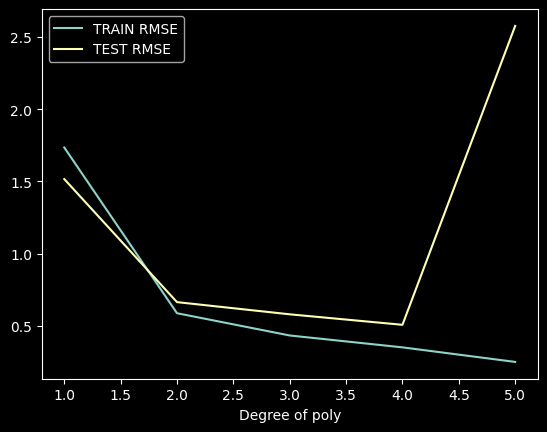

In [48]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')

plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.legend()

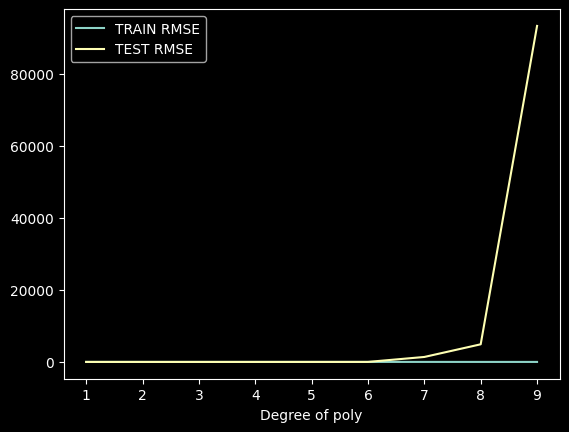

In [49]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')

plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.legend()

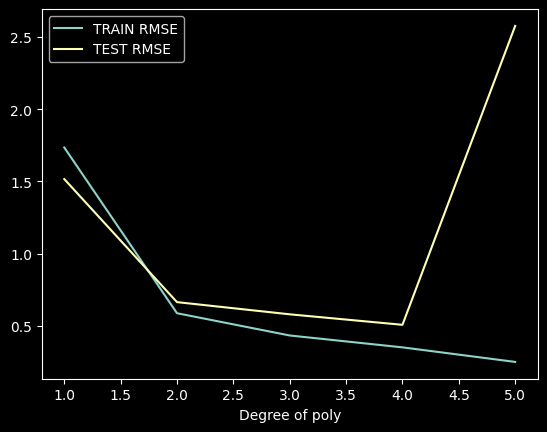

In [50]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')

plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.legend()

In [51]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [52]:
final_model = LinearRegression()

In [53]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X,y)

LinearRegression()

In [54]:
from joblib import dump,load

In [55]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [56]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

# Now using the loaded model

In [57]:
loaded_converter = load('final_converter.joblib')


In [59]:
loaded_model = load('final_poly_model.joblib')

In [60]:
campaign = [[149,22,12]]

In [61]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [62]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [63]:
transformed_data = loaded_converter.fit_transform(campaign)

In [64]:
loaded_model.predict(transformed_data)

array([14.64501014])